In [11]:
%load_ext autoreload
%autoreload 2

from musk.core.sql import MySQL
from musk.core.plot import Plot
from IPython.display import display, HTML
from pandas import DataFrame
import numpy as np 


class PercolationProbabilityPlot(Plot):

    title = "1D percolation"
    ylabel = "Percolation Probability"
    xlabel = "Occupation Probability"
    filename = "examples/images/perc_1d_prob.png"
    figure_quality = 3
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def tanh(X, a, b):
    return (np.tanh(a * (X - b)) + 1) / 2

In [5]:
query = "select size, probability, has_percolated from percolation_2d_square_stats where size in (16, 32, 128, 64, 256, 192, 512)"
query = "select size, probability, has_percolated from percolation_2d_square_stats where size in (32) and probability between 0.54 and 0.66"
mysql = MySQL()
rows = mysql.fetch(query)
df = DataFrame.from_records(rows)

0.54 0.08766660409235967 5327
0.55 0.14296875 6400
0.551 0.1453125 1280
0.552 0.165625 1280
0.553 0.17109375 1280
0.554 0.1578125 1280
0.555 0.1640625 1280
0.556 0.15703125 1280
0.557 0.190625 1280
0.558 0.196875 1280
0.559 0.18828125 1280
0.56 0.20390625 6400
0.561 0.1921875 1280
0.562 0.2125 1280
0.563 0.21484375 1280
0.564 0.215625 1280
0.565 0.2234375 1280
0.566 0.26953125 1280
0.567 0.27109375 1280
0.568 0.2796875 1280
0.569 0.28984375 1280
0.57 0.28375 6400
0.571 0.2875 1280
0.572 0.28828125 1280
0.573 0.31484375 1280
0.574 0.3 1280
0.575 0.36875 1280
0.576 0.34609375 1280
0.577 0.35625 1280
0.578 0.33984375 1280
0.579 0.37734375 1280
0.58 0.374375 6400
0.581 0.38984375 1280
0.582 0.40078125 1280
0.583 0.39296875 1280
0.584 0.42421875 1280
0.585 0.4359375 1280
0.586 0.44609375 1280
0.587 0.45703125 1280
0.588 0.4640625 1280
0.589 0.453125 1280
0.59 0.48265625 6400
0.591 0.50703125 1280
0.592 0.4953125 1280
0.593 0.49609375 1280
0.594 0.49453125 1280
0.595 0.51328125 1280
0.596 0.

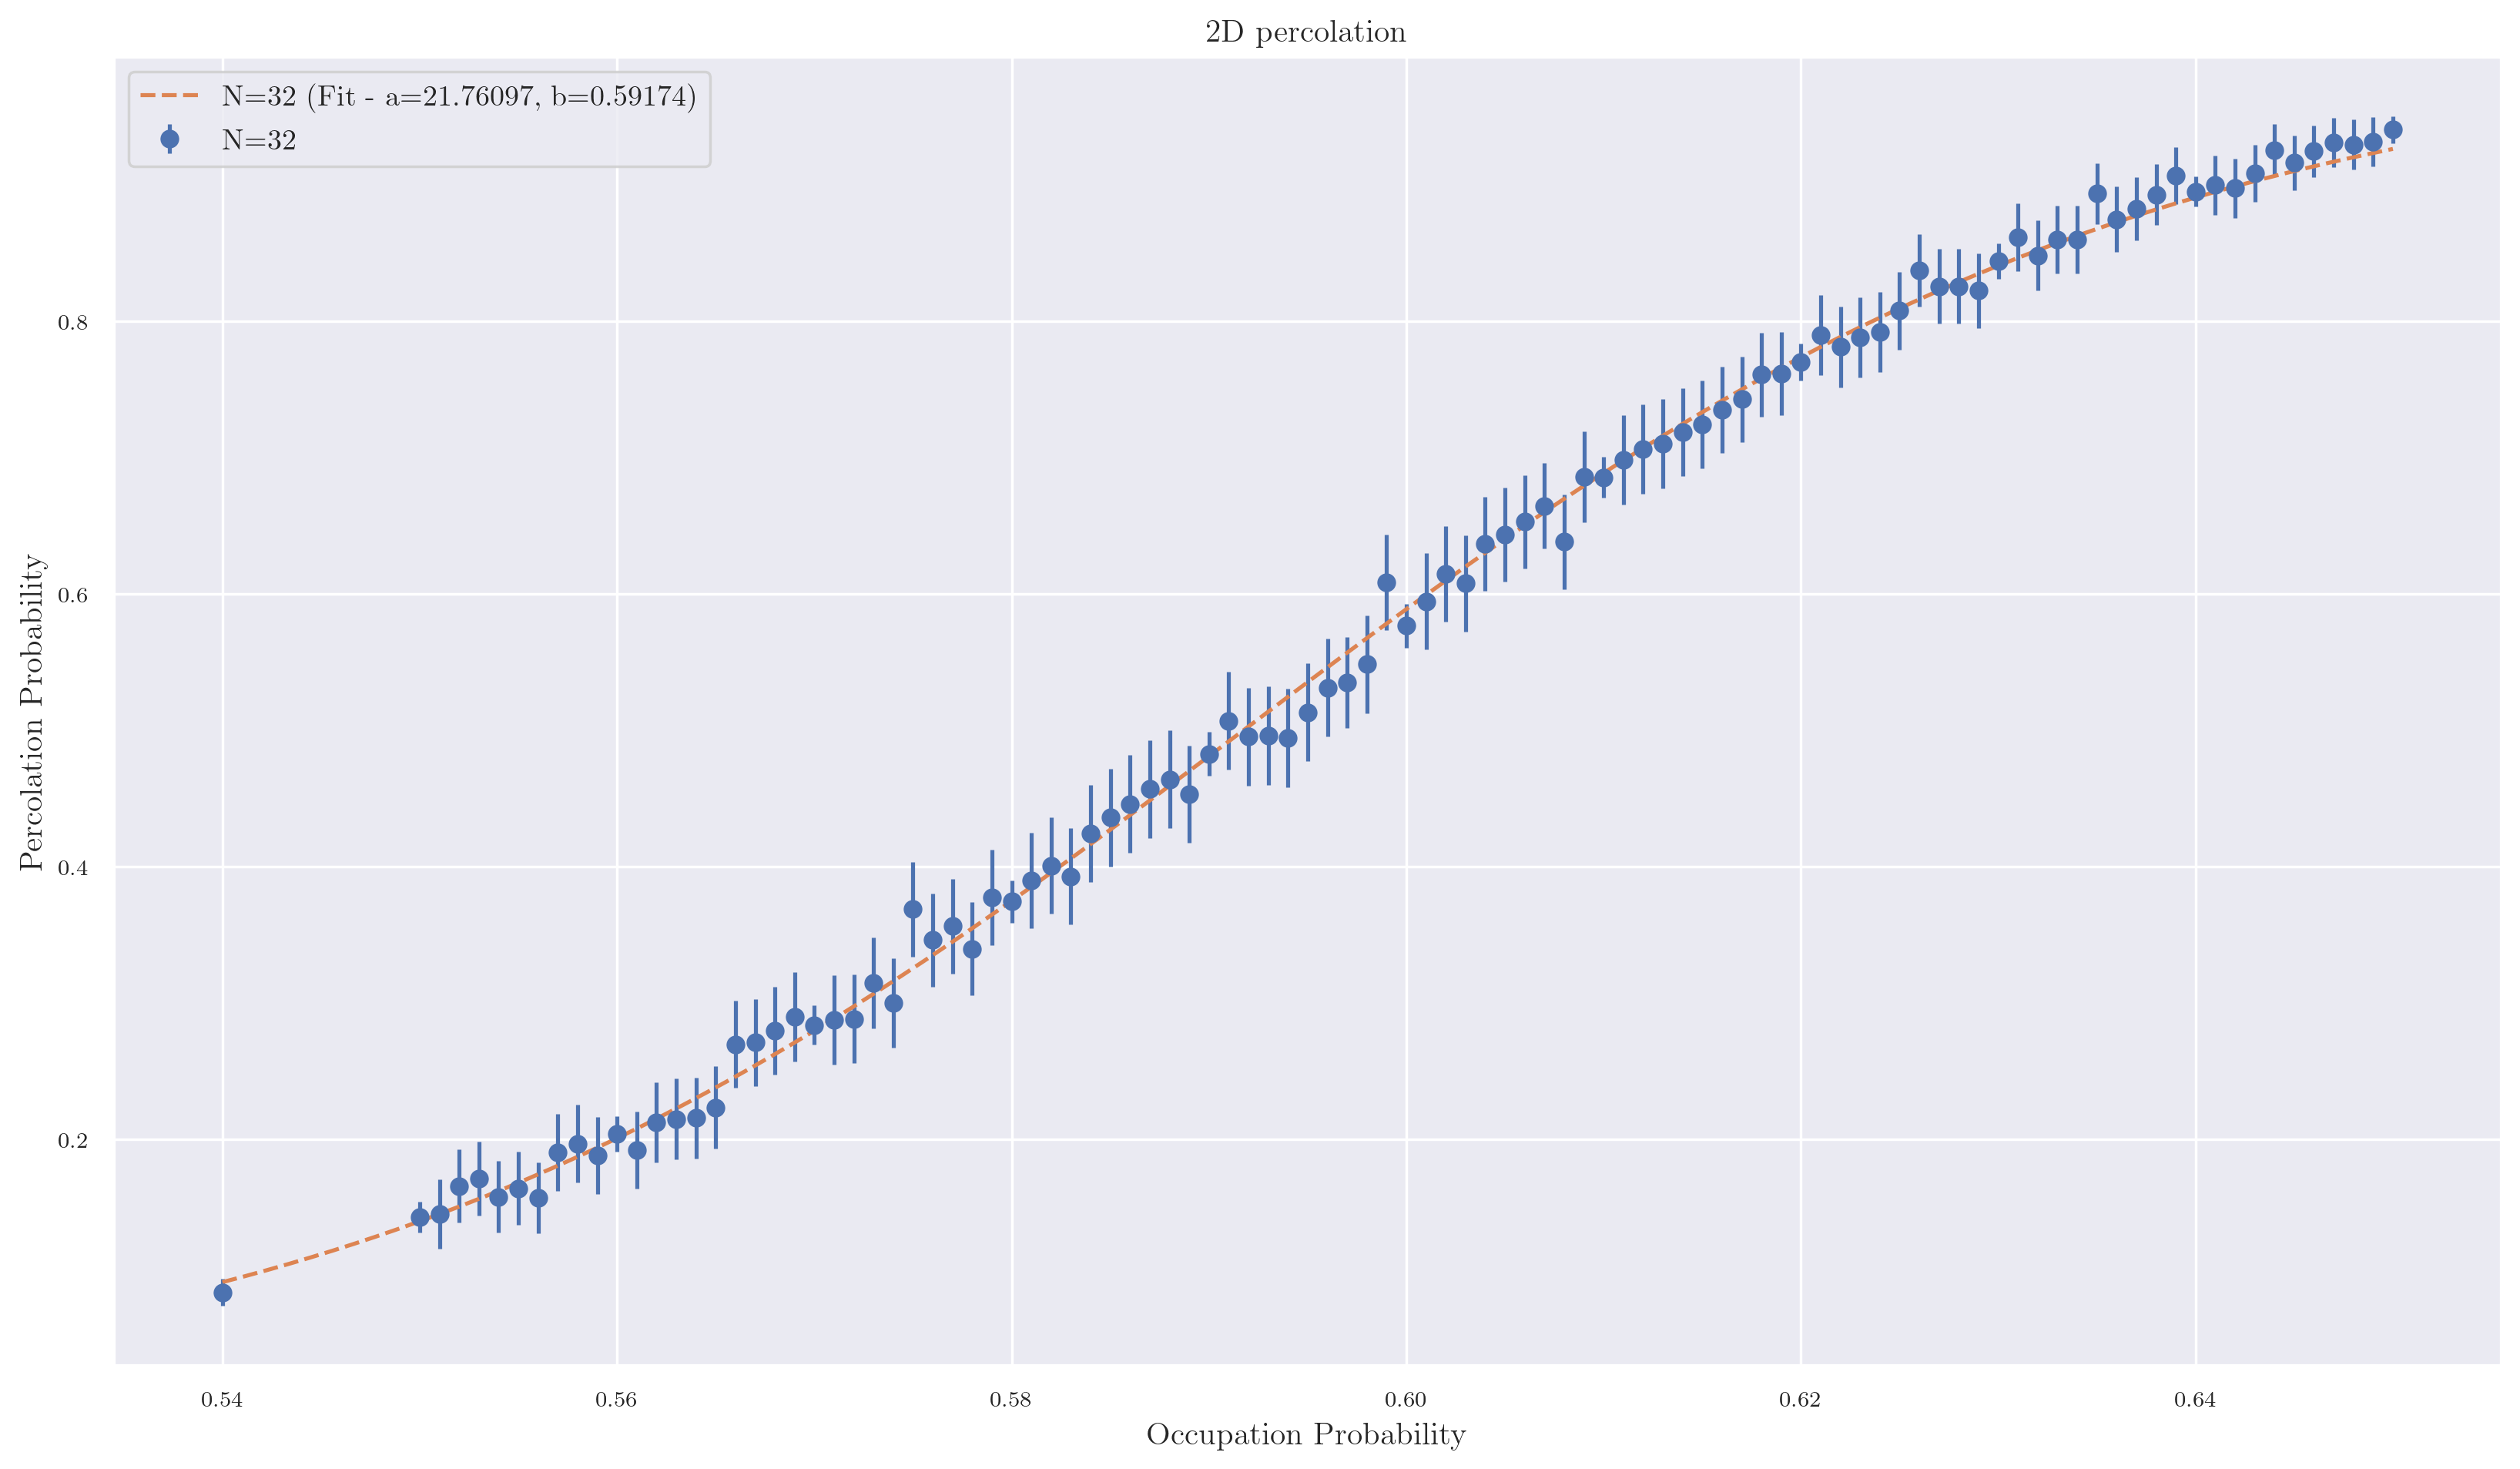

In [33]:
# https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
# plt.axvline(probability)
import matplotlib.pyplot as plt
plot = PercolationProbabilityPlot()
for size, size_group in df.groupby(["size"]):
    X, Y, Y_errors = [], [], []
    for probability, prob_group in size_group.groupby(["probability"]):
        n_samples = len(prob_group)
        p_estimator = prob_group.mean()['has_percolated']
        
        X.append(probability)
        Y.append(p_estimator)
        z = 2.576
        error = z * (p_estimator * (1 - p_estimator)/n_samples)**0.5
        print(probability, p_estimator, n_samples)
        Y_errors.append(error) 
    
    plot.plot(X, Y, f"N={size}", fit_fn=tanh, err=Y_errors)
        
plot.save()

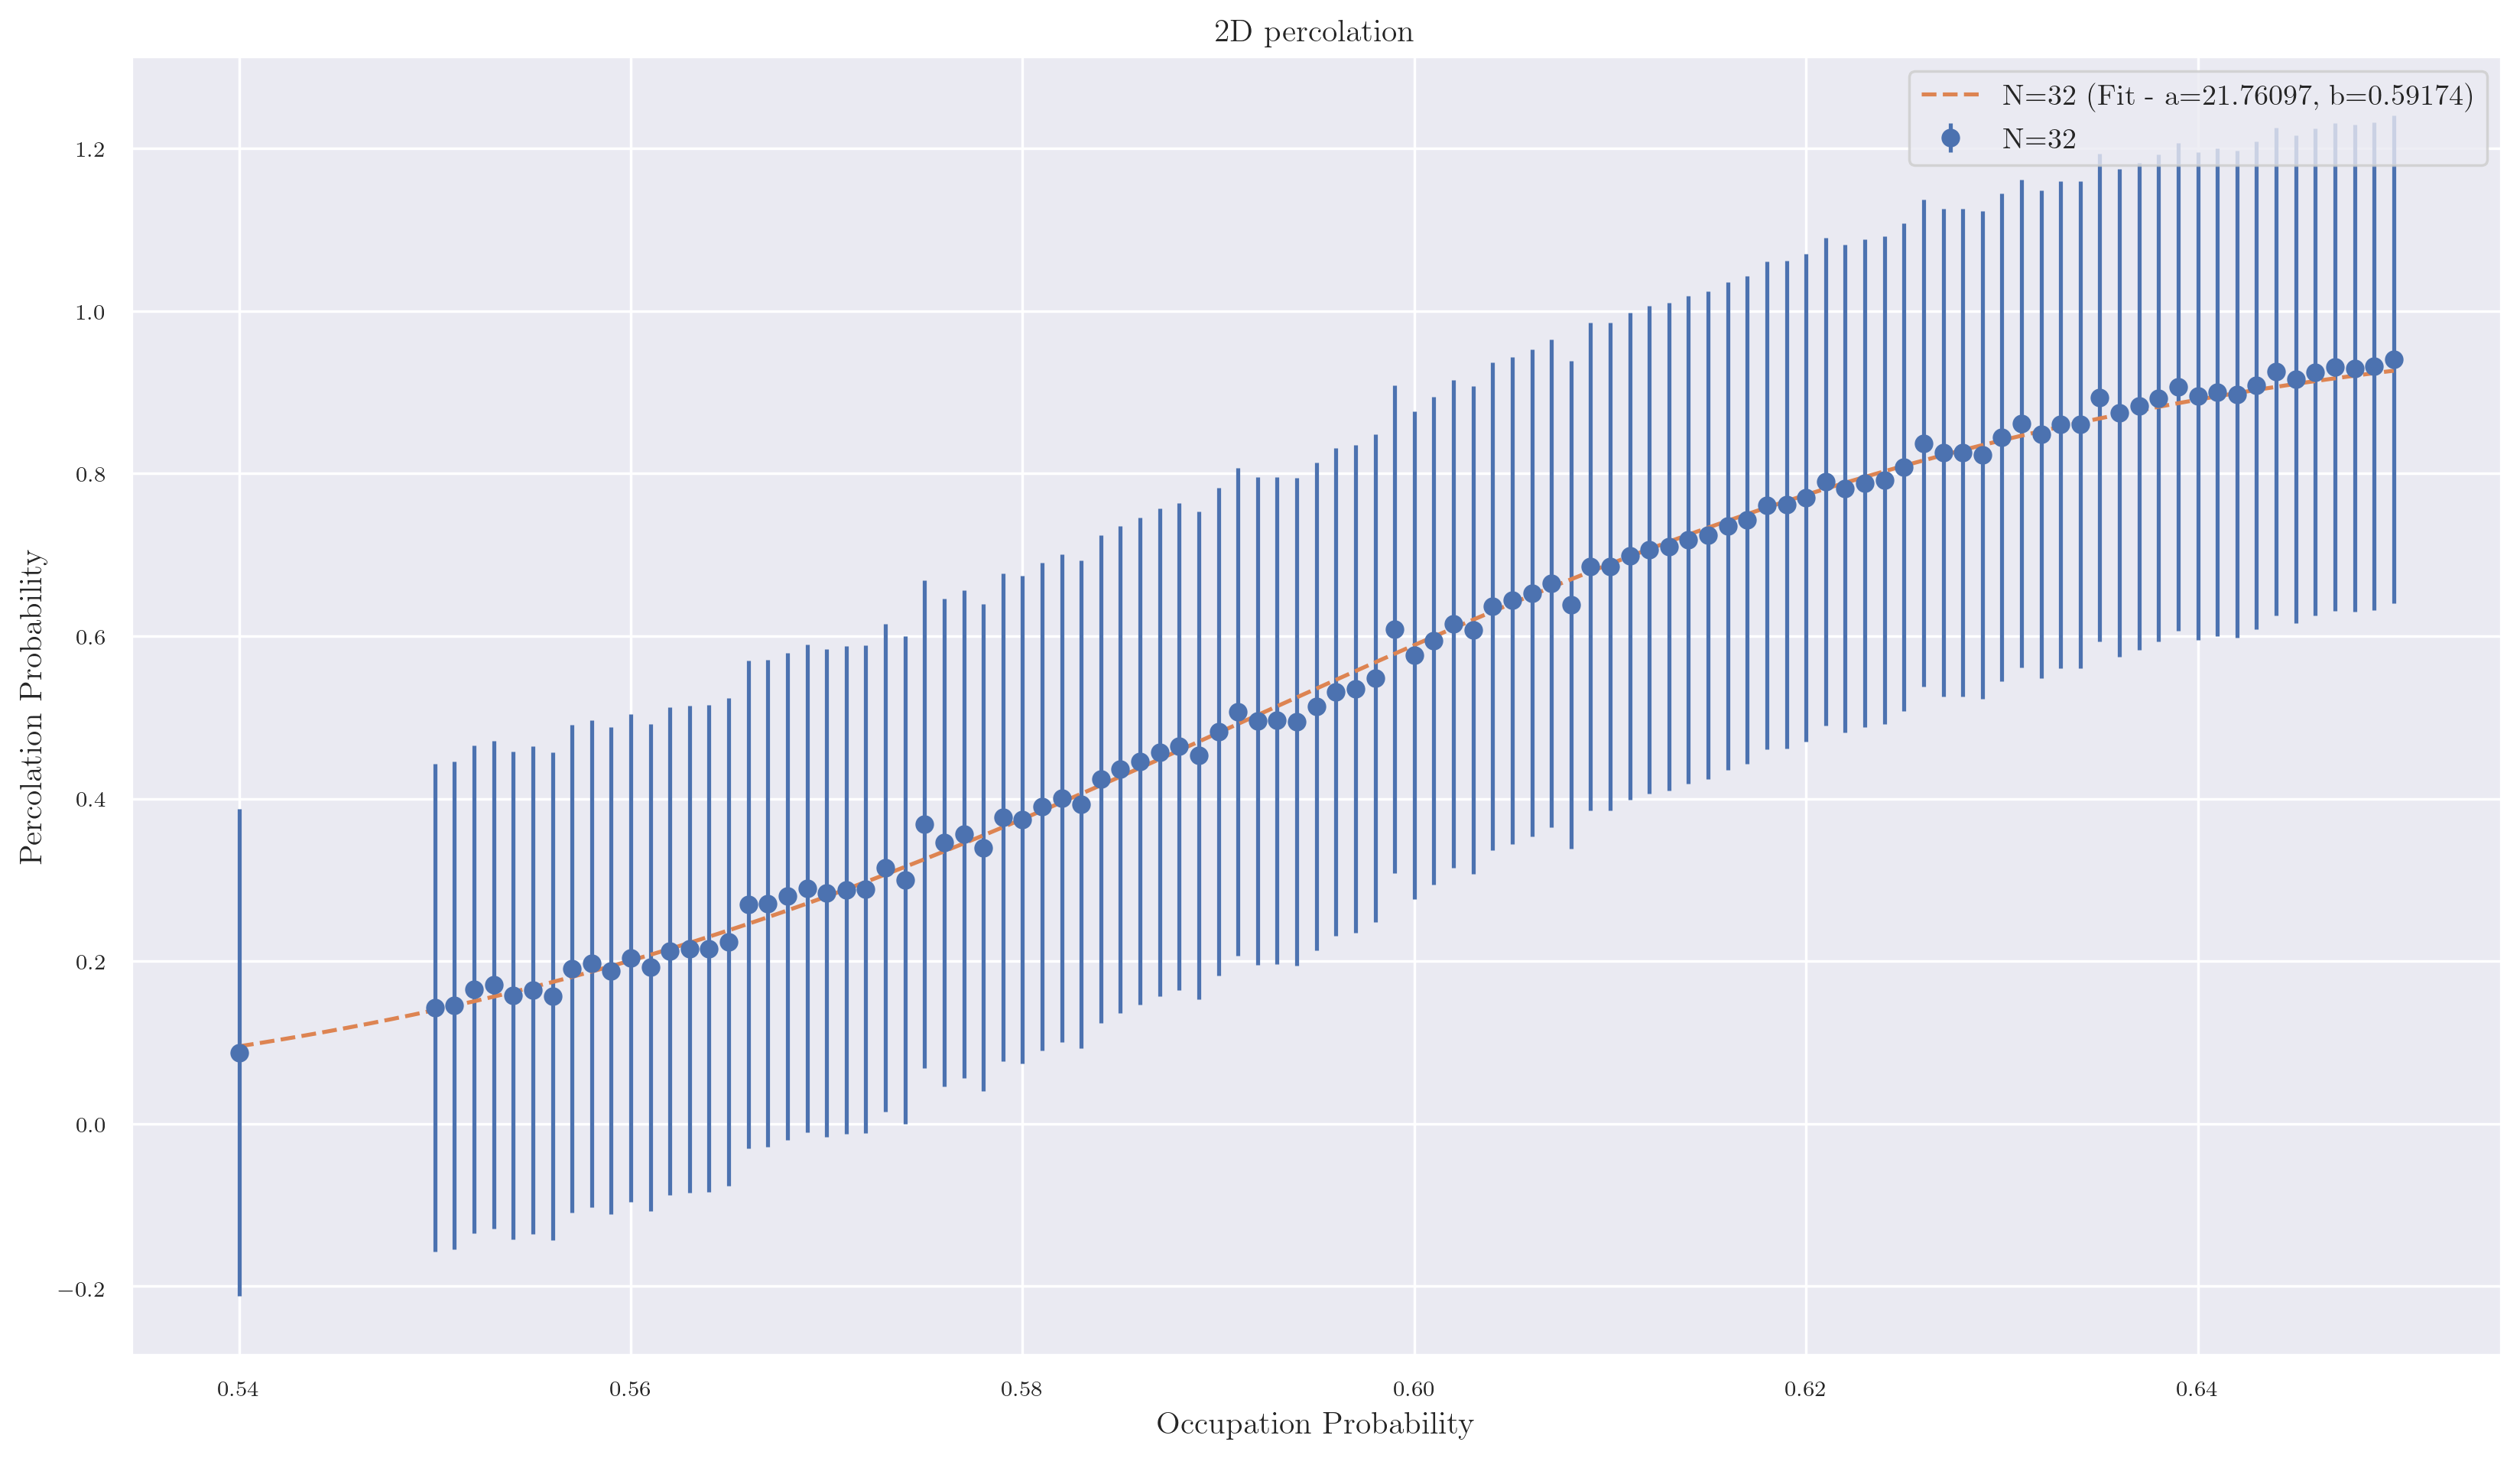

In [19]:
plot = PercolationProbabilityPlot()
for size, size_group in df.groupby(["size"]):
    X, Y = [], []
    for probability, prob_group in size_group.groupby(["probability"]):
        X.append(probability)
        Y.append(prob_group.mean()['has_percolated'])
    plot.plot(X, Y, f"N={size}", fit_fn=tanh, err=[)
        
plot.save()

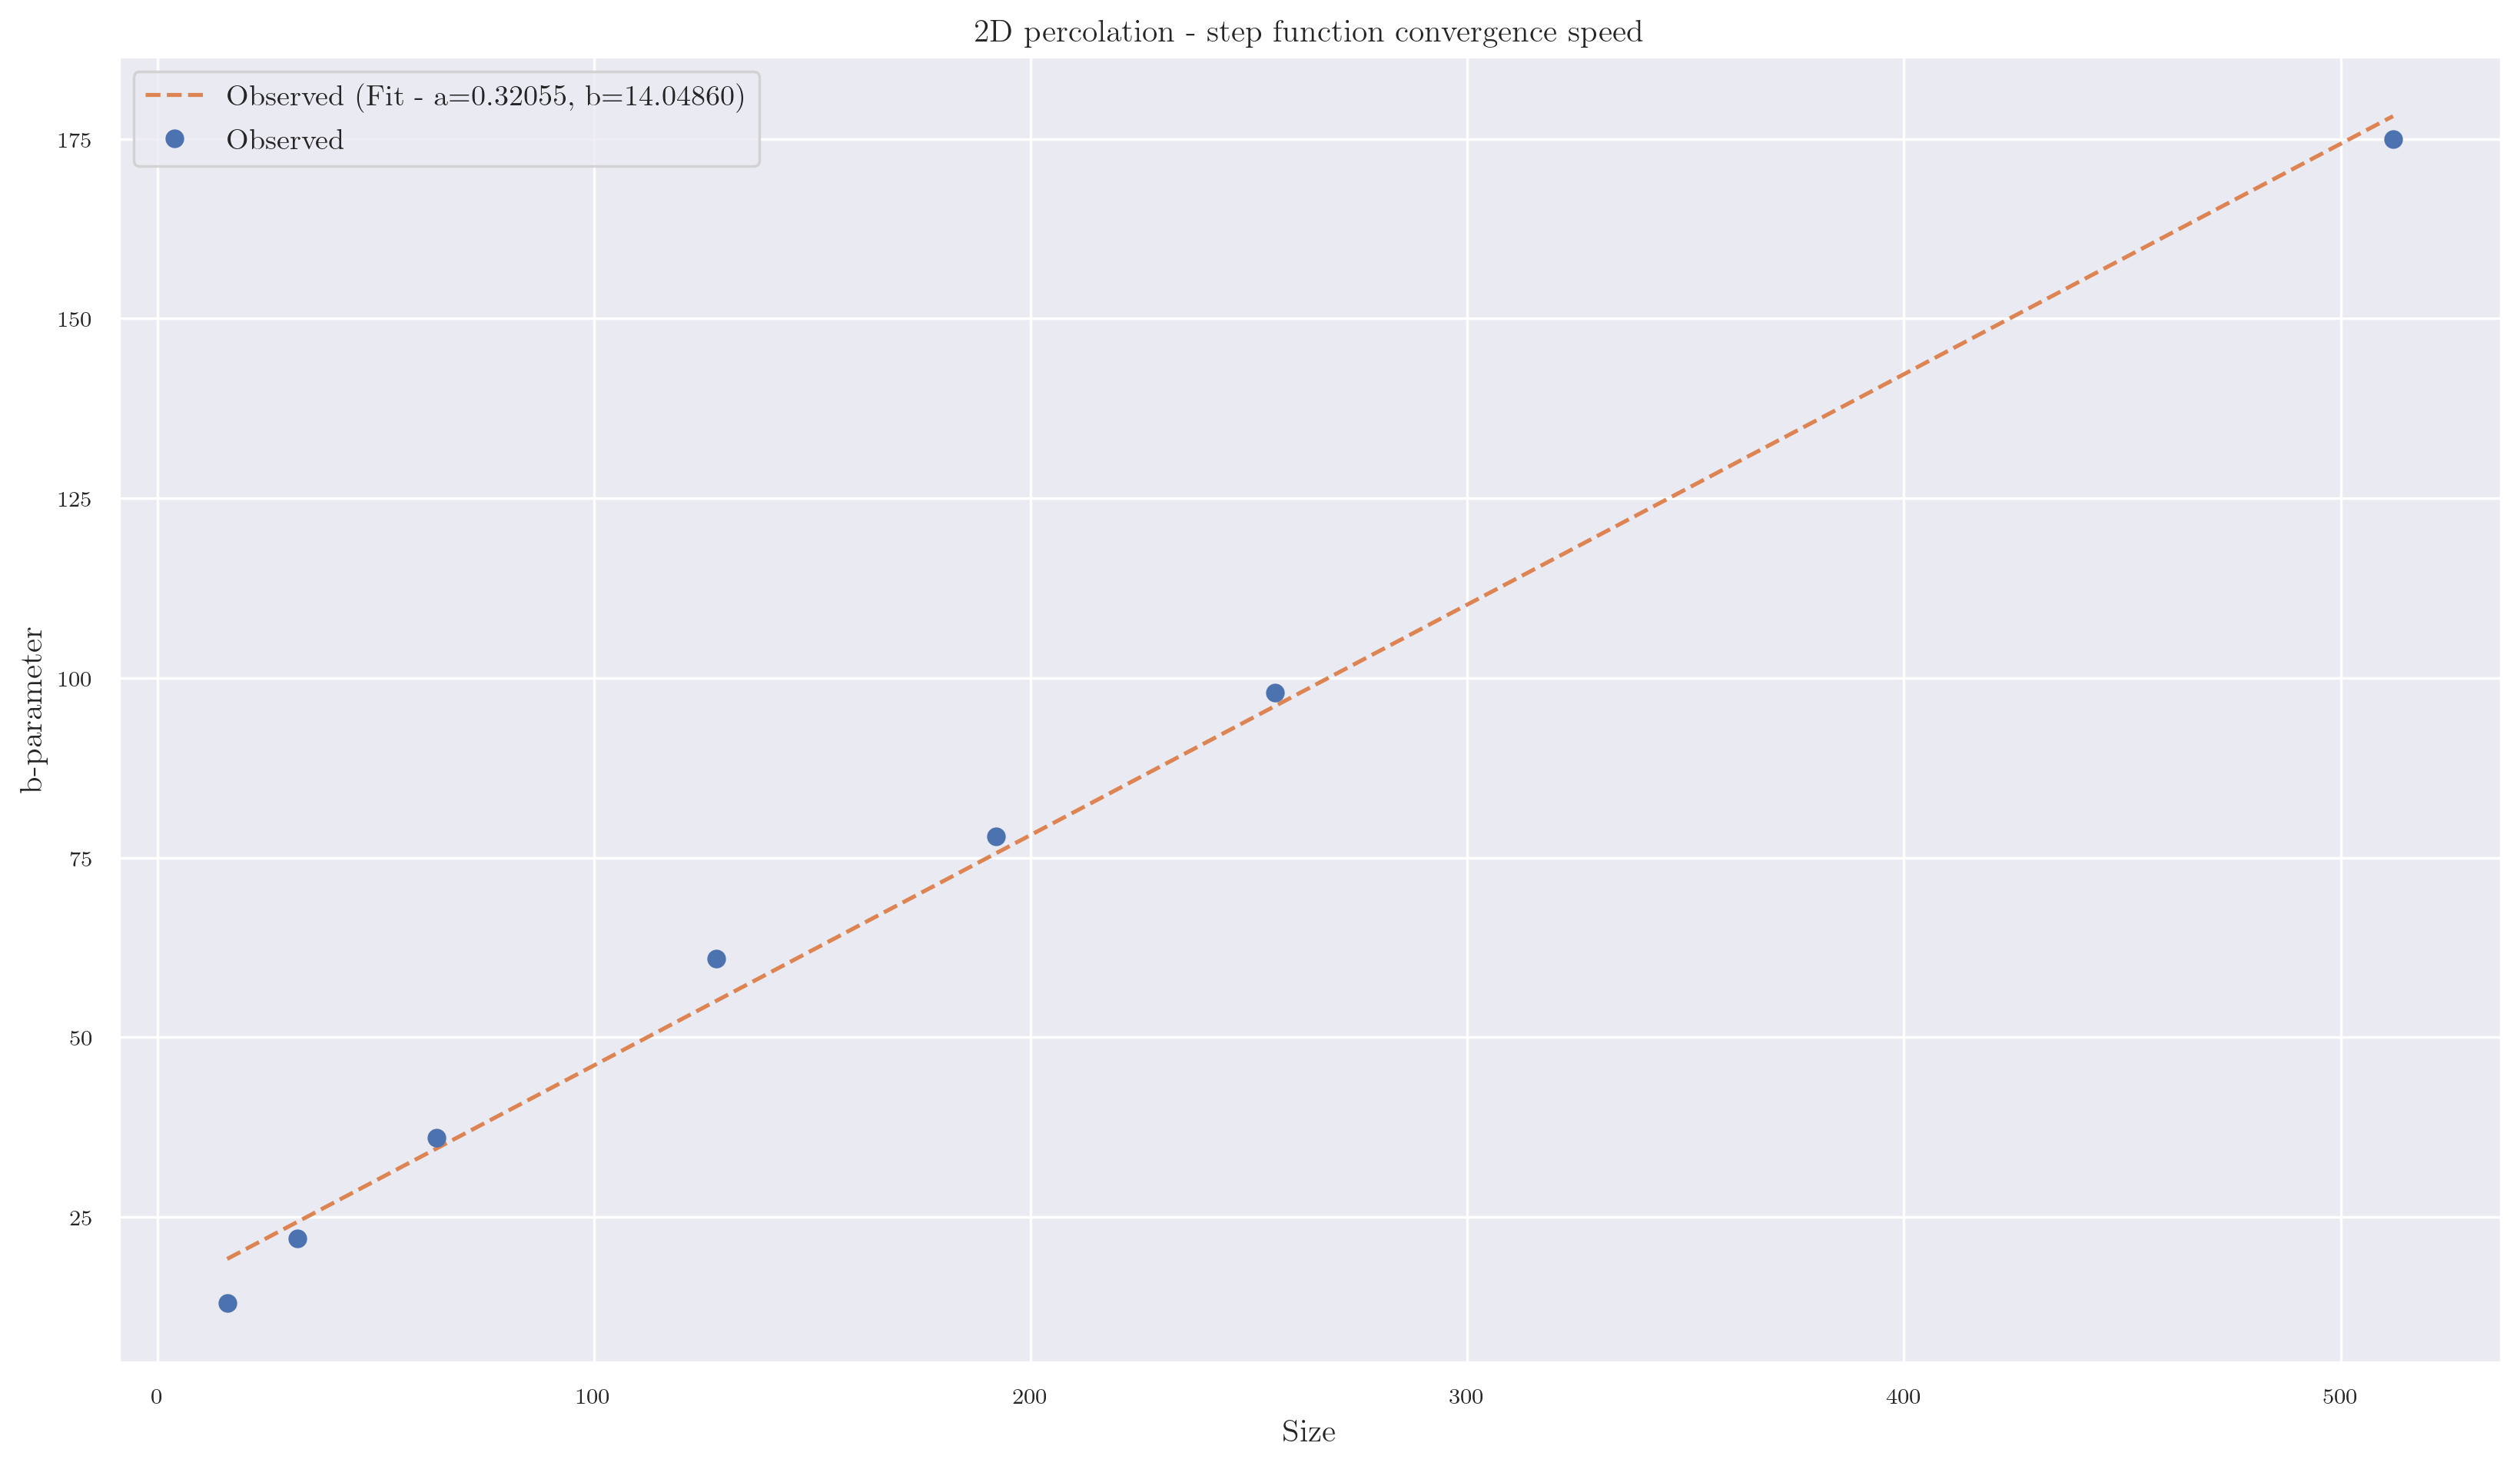

In [17]:
class BParameterPlot(Plot):

    title = "2D percolation - step function convergence speed"
    ylabel = "b-parameter"
    xlabel = "Size"
    filename = "examples/images/perc_2d_b_param.png"
    figure_quality = 3

X = np.array([16, 32, 64, 128, 192, 256, 512])
Y = np.array([13, 22, 36, 61, 78, 98, 175])

plot = BParameterPlot()

plot.plot(X, Y, 'Observed', fit_fn=lambda X, a, b: a*X + b)
plot.save()

